# Kaggle案例[泰坦尼克号问题](https://www.kaggle.com/c/titanic)

Titanic的故事大家都知道，由于救生艇有限，并非人人都能存活下来。是否得救也并非随机，我们是否能够根据乘客的信息和存活状况来给出乘客的存活概率呢？这是一个二分类问题，也与我们的评分卡类似。

本文的前半部分将使用Pandas(Python Data Analysis Library)与Scikit-learn机器学习库对泰坦尼克号的乘员信息进行挖掘，包括：
* 数据可视化（Pandas，Seaborn）
* 特征相关性分析（Pandas）
* 特征工程（Pandas，re）
* 利用逻辑回归算法建立生存几率模型（Scikit-learn）

本文的后半部分将使用基于Tensorflow的高层次API：TFLearn，构建深度神经网络（DNN）。这么做的原因：
* 首先是因为逻辑回归本身就可以看做是简化了的神经网络。
* 其次在面对衍生变量问题的时候，人工进行衍生变量的生成是极为低效且不可靠的。神经网络的隐藏层很好的完成了衍生变量生成的工作。
* 最后采用深度网络，利用Dropout方法，提高了模型的泛化能力。

## [Pandas](http://pandas.pydata.org/)
Python Data Analysis Library 或 pandas 是基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。pandas提供了大量能使我们快速便捷地处理数据的函数和方法。你很快就会发现，它是使Python成为强大而高效的数据分析环境的重要因素之一。
<img src="assets/Pandas.jpg" width='800'>

## [Scikit-learn](http://scikit-learn.org/stable/index.html)
scikit-learn 是一个用于机器学习的 Python 库,建立在 SciPy 基础之上。其基本功能主要被分为六个部分：分类，回归，聚类，数据降维，模型选择，数据预处理。官网上有详细的示例及文档。
<img src="assets/Scikit_learn.jpg" width='800'>

## [Tensorflow](www.tensorfly.cn/)
TensorFlow™ 是一个采用数据流图（data flow graphs），用于数值计算的开源软件库。节点（Nodes）在图中表示数学操作，图中的线（edges）则表示在节点间相互联系的多维数据数组，即张量（tensor）。它灵活的架构让你可以在多种平台上展开计算，例如台式计算机中的一个或多个CPU（或GPU），服务器，移动设备等等。TensorFlow 最初由Google大脑小组（隶属于Google机器智能研究机构）的研究员和工程师们开发出来，用于机器学习和深度神经网络方面的研究，但这个系统的通用性使其也可广泛用于其他计算领域。
<img src="assets/Tensorflow.jpg" width='300'>

### 初探数据

In [1]:
import pandas as pd #数据分析包
import numpy as np #科学计算包
from pandas import Series,DataFrame
import os
original_data = pd.read_csv("train.csv")
total_data = original_data.copy()
total_data.columns #查看数据集的字段

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**<font color=blue>数据集包含以下字段</font>**<br>
PassengerId:     乘客ID<br>
Pclass:        舱位等级(头等舱/二等舱/三等舱)<br>
Name:         乘客姓名<br>
Sex:          性别<br>
Age:          年龄<br>
SibSp:         堂兄弟/妹个数<br>
Parch:         父母与小孩个数<br>
Ticket:        船票信息<br>
Fare:         票价<br>
Cabin:         客舱号<br>
Embarked:       登船港口<br>
Survived:       是否生存

In [2]:
#看看数据集是什么样的
total_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


可以看到，里边包含了数值型的数据，也有标称数据和文本数据。同时有些字段还存在缺失值例如：Cabin 与 Age<br>
首先看看数据汇总的情况

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


上面的汇总数据显示，我们拿到的数据集中，总共有891名乘客，有些字段的数据不全，比如说：<br>

* <font color=red>Age</font>(714条有效记录，缺失比例19.8%)
* <font color=red>Cabin</font>(204条有效记录，缺失比例77.1%)
* <font color=red>Embarked</font>(889条有效记录，缺失比例0.2%)<br>
对于数值型字段，看看它们的统计描述：

In [4]:
total_data.describe()

F:\Tools\Conda\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可以看到，大约有38.4%的人最终获救。乘客的平均年龄约为30岁，头等舱的人数较少，三等舱的人数较多。
可视化永远是认识数据最好的方法之一。

In [5]:
total_data_plot = total_data.copy()
total_data_plot = total_data_plot.drop(['Cabin'],axis = 1)
total_data_plot = total_data_plot.dropna()
total_data_plot['Sex'] = pd.factorize(total_data_plot.Sex)[0]
total_data_plot['Embarked'] = pd.factorize(total_data_plot.Embarked)[0]

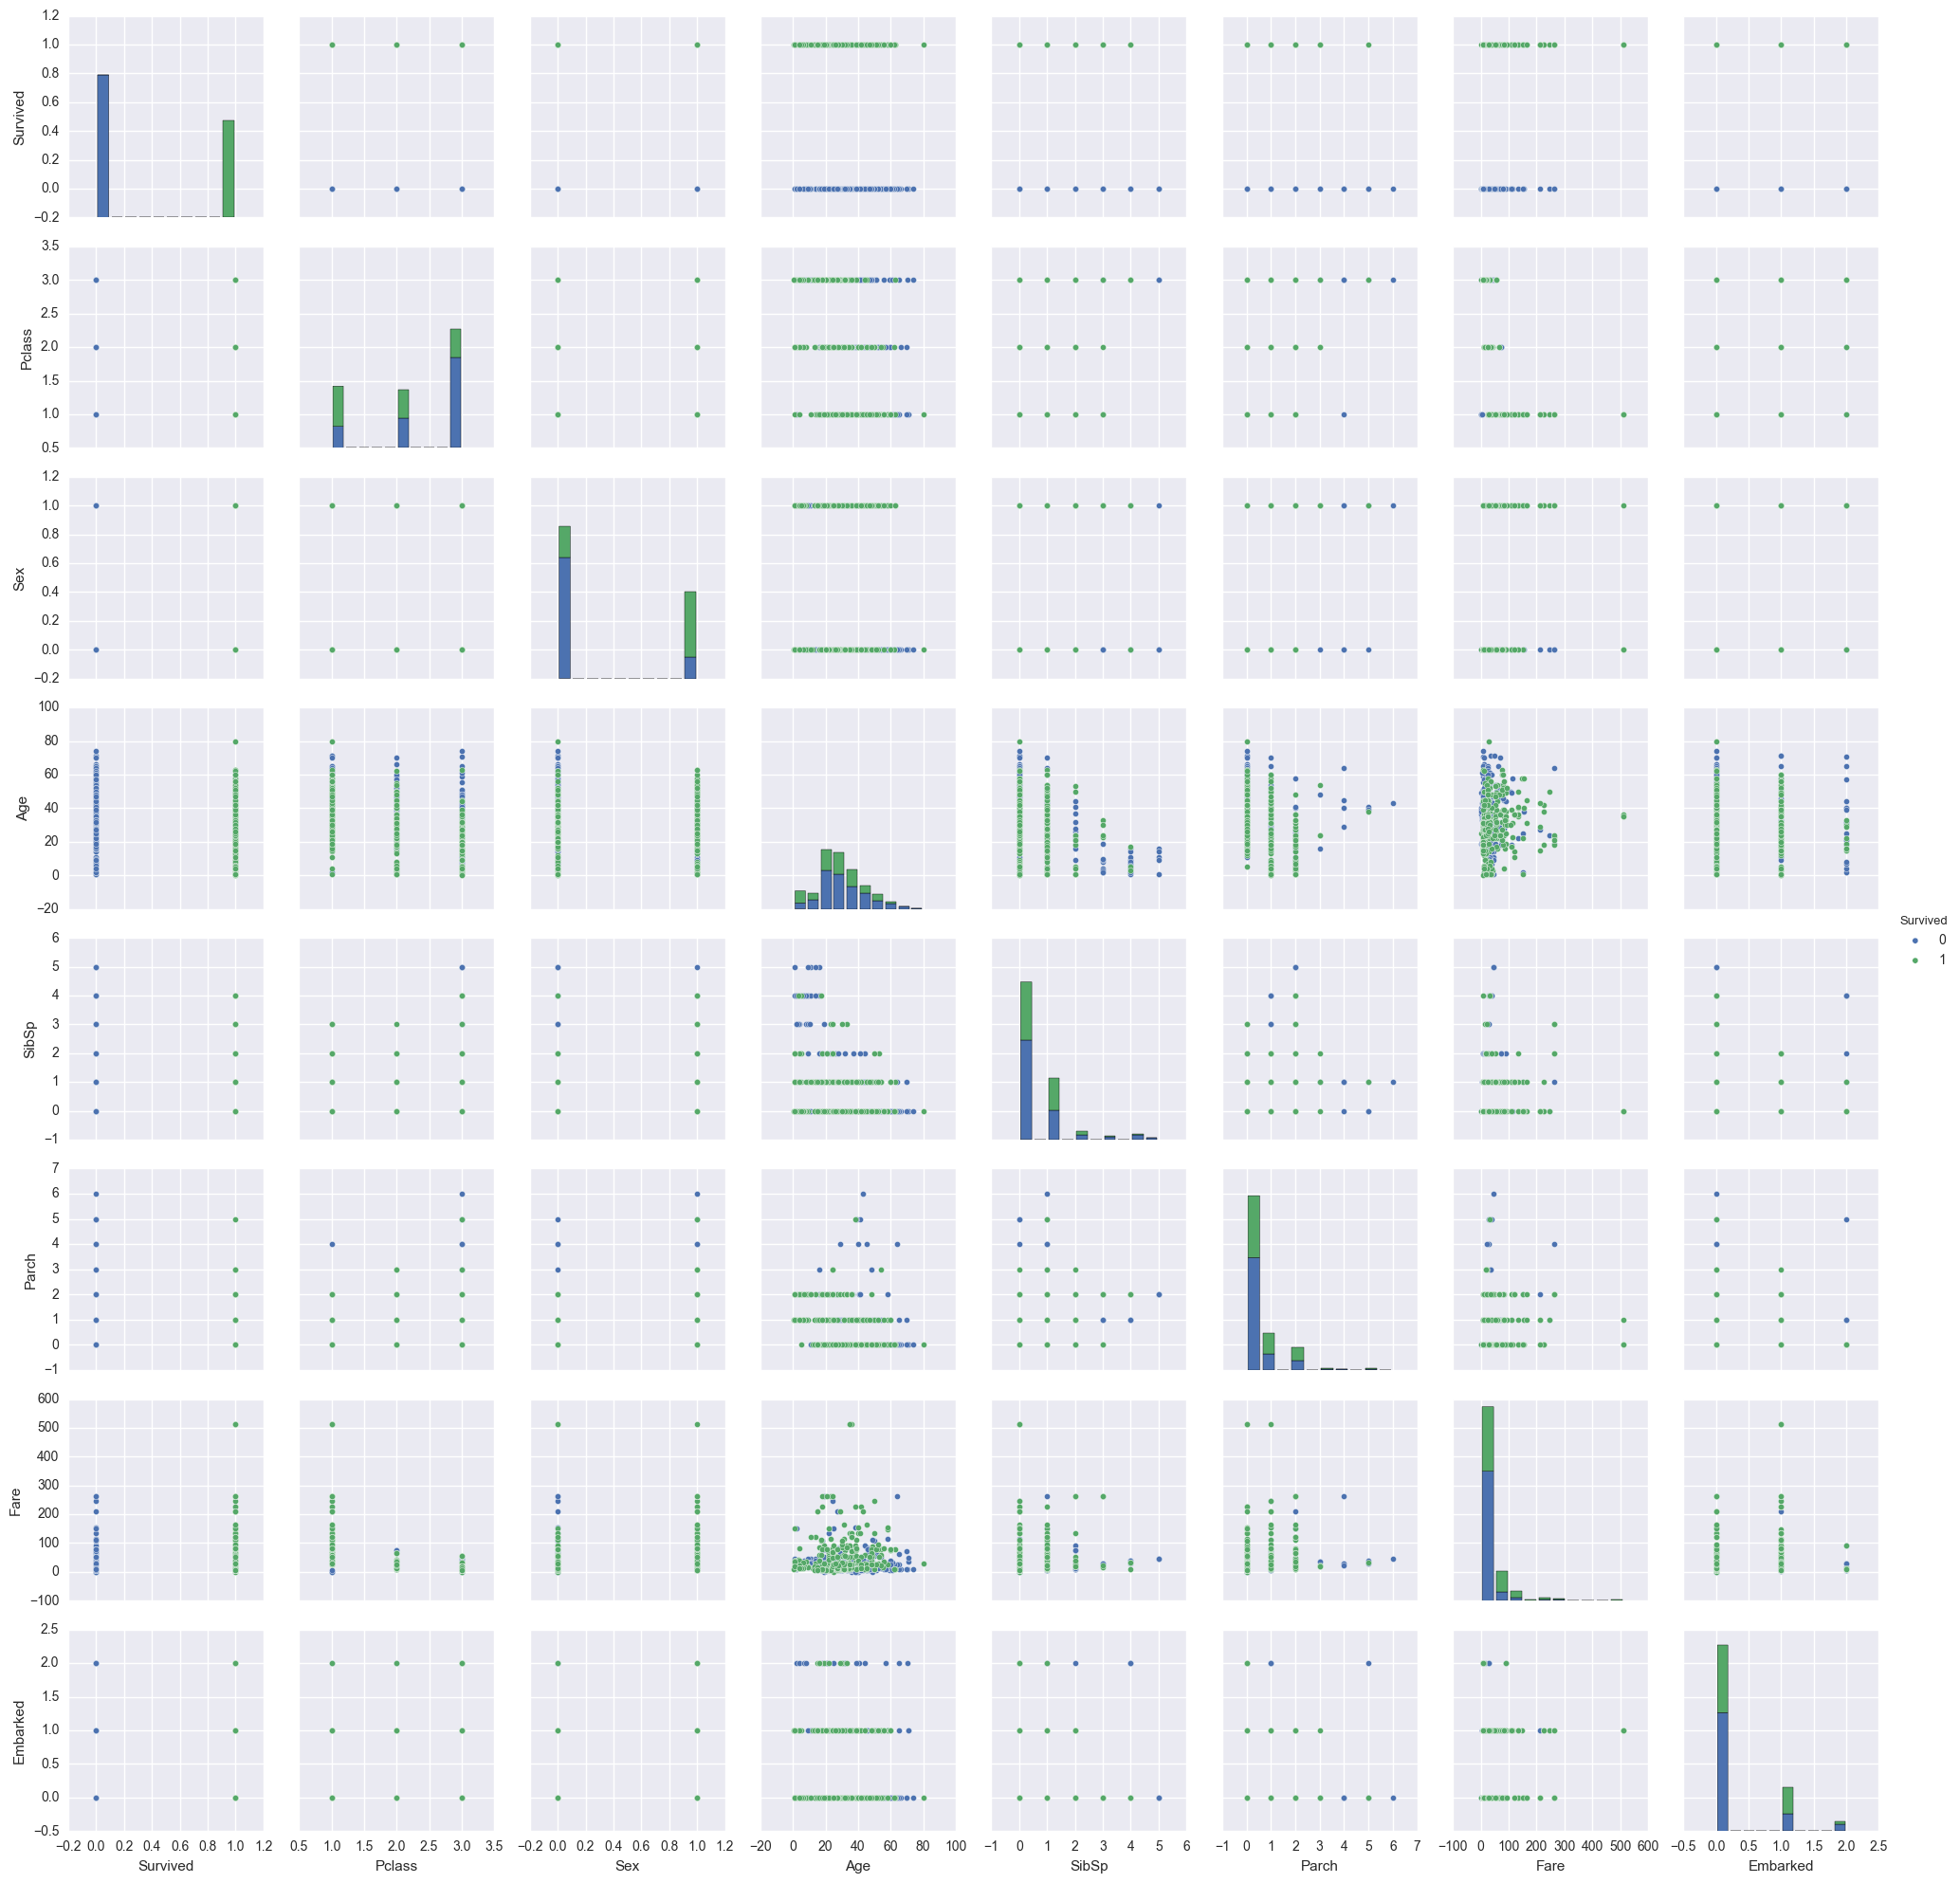

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式
plt.figure(figsize=(10, 8))
sns.set() #使用默认配色  
sns.pairplot(total_data_plot.iloc[:,1:],hue="Survived")   #hue 选择分类列  
plt.show()  

可视化后，数据就非常直观了：
<font color=red>1. 舱位等级对于获救率有明显影响，头等舱获救率更高，三等舱人数最多获救率最低</font><br>
<font color=red>2. 女性乘客获救率远大于男性乘客</font><br>
<font color=red>3. 幼儿获救率较高，老人死亡率较高</font><br>
<font color=red>4. 登船港口影响了存活率</font><br>

下面我们看一下相关性系数矩阵

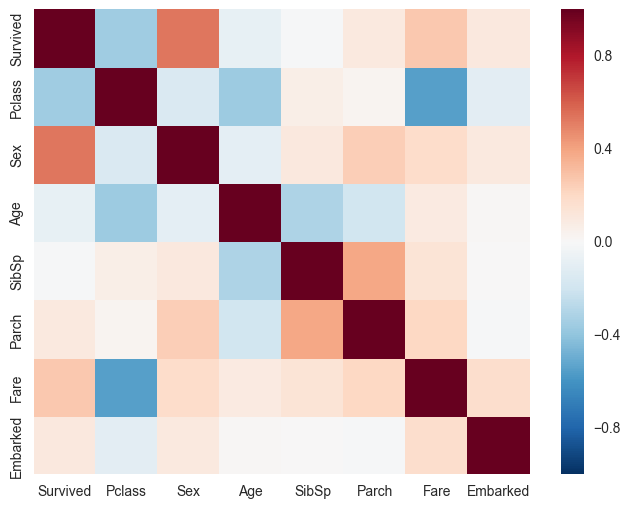

In [7]:
plt.figure(figsize=(8, 6))
_ = sns.heatmap(total_data_plot.iloc[:,1:].corr(), annot=False)#很方便的利用.corr方法输出相似性矩阵

可以看到：
1. 存活与否最为相关的两个变量为：舱位等级与性别
2. 舱位等级与船票是强相关变量
3. 表亲的数目与年龄弱相关（可能都带着一起玩儿了）

### 特征工程(缺失值处理)

通常遇到缺值的情况，我们会有几种常见的处理方式：
* 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了<br>
* 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中<br>
* 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。<br>
* 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。<br>


存在缺失值的有三个字段：Embarked（缺失比例0.2%），Age（缺失比例19.8%）以及Cabin（缺失比例77.1%）

<font color=red>1. 先说Cabin，由于缺失值比例过大，再此选择删除此字段。</font><br>
<font color=red>2. 再说Age, 注意到Name字段中存在Mr. Miss. 以及 Mrs. 这样的称谓，尝试使用各个称谓对应的年龄均值填入缺失值。如果实在找不到称谓，则利用其余字段利用RandomForest填入预测值。</font><br>
<font color=red>3. 对于Embarked,只有两条缺失值，选择删除此数据。并不会对整体数据产生明显影响。</font><br>

In [8]:
# Drop column 'Cabin'
total_data = total_data.drop(['Cabin'],axis = 1)
# Drop Embarked missing valuesb
total_data = total_data[total_data['Embarked'].notnull()]

In [9]:
#对于Age的处理，我们首先要对Name进行处理
import re
#利用正则表达式，提取称谓
total_data['Title'] = total_data['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])

In [10]:
#看看都有些什么称谓
total_data.Title.value_counts()

 Mr              517
 Miss            181
 Mrs             124
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 the Countess      1
 Sir               1
 Jonkheer          1
 Mme               1
 Ms                1
 Don               1
 Lady              1
 Capt              1
Name: Title, dtype: int64

In [11]:
#这些称号有法语还有英语，需要依据当时的文化环境将其归类
total_data.loc[total_data[total_data.Title==' Jonkheer'].index,['Title']] = ' Master'
total_data.loc[total_data[total_data.Title.isin([' Ms',' Mlle'])].index,['Title']] = ' Miss'
total_data.loc[total_data[total_data.Title == ' Mme'].index,['Title']] = ' Mrs'
total_data.loc[total_data[total_data.Title.isin([' Capt', ' Don', ' Major', ' Col', ' Sir'])].index,['Title']] = ' Sir'
total_data.loc[total_data[total_data.Title.isin([' Dona', ' Lady', ' the Countess'])].index,['Title']] = ' Lady'

In [12]:
#重新看看都有些什么称谓
total_data.Title.value_counts()

 Mr        517
 Miss      184
 Mrs       125
 Master     41
 Dr          7
 Sir         7
 Rev         6
 Lady        2
Name: Title, dtype: int64

In [13]:
#现在，我们需要统计每一个Title所对应的年龄的均值
Title_list = list(total_data['Title'].drop_duplicates())
Title_age = {}
for i in Title_list:
    Title_age[i] = total_data[total_data.Title == i].Age.mean()
print (Title_age)

{' Mrs': 35.5462962962963, ' Mr': 32.368090452261306, ' Miss': 21.736486486486488, ' Sir': 53.142857142857146, ' Dr': 42.0, ' Master': 5.477567567567568, ' Lady': 40.5, ' Rev': 43.166666666666664}


In [14]:
#更新缺失值
for i in Title_list:
    total_data.loc[total_data[(total_data['Age'].isnull()) & (total_data['Title'] == i)].index,['Age']] = Title_age[i]

In [15]:
#查看缺失值情况
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Title          889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


### 特征工程(虚拟变量)

对于标称型数据可将其转变为虚拟变量，可用于创造虚拟变量的字段共有四个：‘Pclass’、‘Sex’、‘Embarked’以及‘Title’。<br>
Pandas提供了非常方便的创造虚拟变量的方法[pd.get_dummys()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [16]:
dummies_Pclass = pd.get_dummies(total_data['Pclass'], prefix= 'Pclass')
dummies_Sex = pd.get_dummies(total_data['Sex'], prefix= 'Sex')
dummies_Embarked = pd.get_dummies(total_data['Embarked'], prefix= 'Embarked')
dummies_Title = pd.get_dummies(total_data['Title'], prefix= 'Title')
total_data = pd.concat([total_data, dummies_Pclass, dummies_Sex, dummies_Embarked, dummies_Title], axis=1)
#删除虚拟变量对应的原始变量
total_data.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

### 特征工程(特征缩放)

我们打算使用逻辑回归算法进行最终的预测，在使用梯度下降算法更新各变量权重时，牵涉到距离的计算。为了避免各变量值尺度上的不同导致梯度下降算法收敛缓慢甚至无法收敛，需要对特征进行缩放<br>
Scikit-learn提供了便利的特征缩放方法[preprocessing.StandardScaler()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
total_data['Age_scaled'] = scaler.fit_transform(total_data['Age'].reshape(-1,1))
total_data['Fare_scaled'] = scaler.fit_transform(total_data['Fare'].reshape(-1,1))
total_data.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,...,Title_ Dr,Title_ Lady,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev,Title_ Sir,Age_scaled,Fare_scaled
0,1,0,22.00000,1,0,7.2500,Mr,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.582478,-0.500240
1,2,1,38.00000,1,0,71.2833,Mrs,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.627091,0.788947
2,3,1,26.00000,0,0,7.9250,Miss,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.280086,-0.486650
3,4,1,35.00000,1,0,53.1000,Mrs,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.400297,0.422861
4,5,0,35.00000,0,0,8.0500,Mr,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.400297,-0.484133
5,6,0,32.36809,0,0,8.4583,Mr,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.201330,-0.475913
6,7,0,54.00000,0,0,51.8625,Mr,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.836660,0.397946
7,8,0,2.00000,3,1,21.0750,Master,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.094438,-0.221900
8,9,1,27.00000,0,2,11.1333,Mrs,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.204487,-0.422057
9,10,1,14.00000,1,0,30.0708,Mrs,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.187262,-0.040787


### Baseline(LogisticRegression建模)

In [18]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
import random

X = total_data.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*').as_matrix()[:, 1:]
y = total_data.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*').as_matrix()[:, 0]

def split_dataset(total_data):  
    random_state = random.randint(1,10000)
    # 将数据集拆分成训练集与验证集
    train_split,crossvalid_split = train_test_split(total_data, test_size=0.1, random_state=random_state)
    train_df = train_split.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*').copy()
    valid_df =crossvalid_split.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*').copy()

    # y即Survival结果
    y_train = train_df.as_matrix()[:, 0]
    y_valid = valid_df.as_matrix()[:, 0]

    # X即特征属性值
    X_train = train_df.as_matrix()[:, 1:]
    X_valid = valid_df.as_matrix()[:, 1:]
    return X_train,X_valid,y_train,y_valid

X_train,X_valid,y_train,y_valid = split_dataset(total_data)
estimator = LogisticRegression()
parameter = {'penalty':('l1','l2'),'C':tuple(np.linspace(.05, 5., 10))}
clf = GridSearchCV(estimator,parameter,cv = 10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': (0.050000000000000003, 0.60000000000000009, 1.1500000000000001, 1.7000000000000002, 2.25, 2.7999999999999998, 3.3500000000000001, 3.9000000000000004, 4.4500000000000002, 5.0), 'penalty': ('l1', 'l2')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

F:\Tools\Conda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


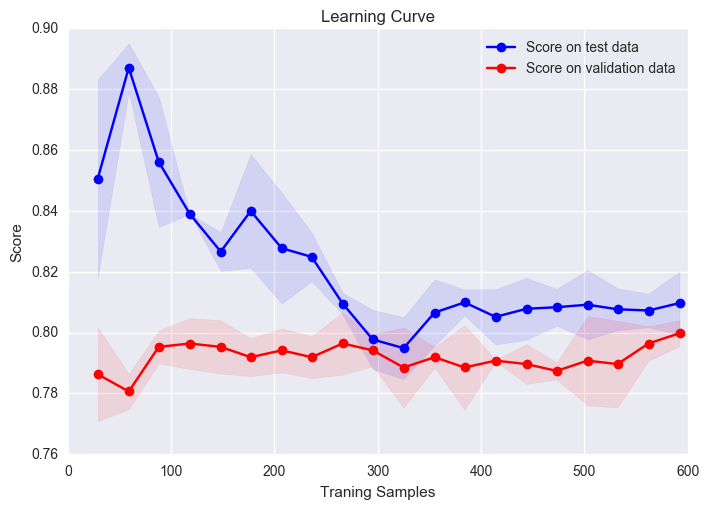

(0.80776254329711072, 0.024547859701781083)

In [19]:
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Traning Samples")
        plt.ylabel("Score")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Score on test data")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Score on validation data")
    
        plt.legend(loc="best")
        plt.draw()
        plt.gca().invert_yaxis()
        plt.grid()
        plt.show()
     
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, "Learning Curve", X, y)

Normalized confusion matrix
[[ 0.8490566   0.1509434 ]
 [ 0.36111111  0.63888889]]


accuracy  =  0.76404494382
alive_precision= 0.741935483871     alive_recall= 0.638888888889     alive_f1= 0.686567164179
dead_precision= 0.775862068966     dead_recall= 0.849056603774     dead_f1= 0.810810810811


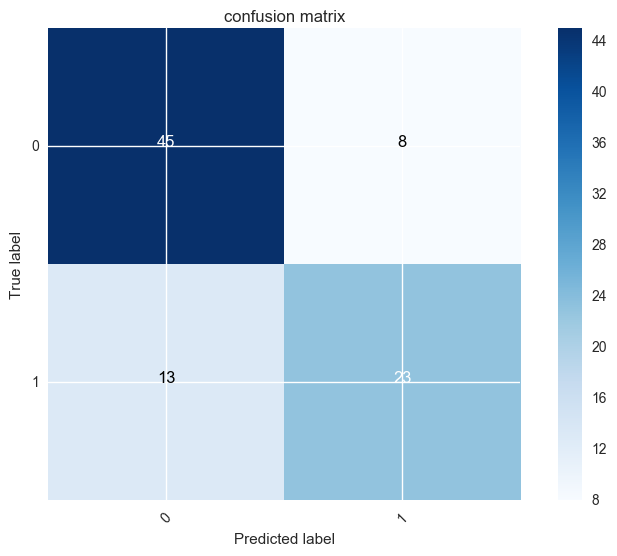

In [20]:
#绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm1 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        print(cm1)
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    accuracy = (cnf_matrix[1][1]+cnf_matrix[0][0])/cnf_matrix.sum()
    alive_precision = cnf_matrix[1][1]/cnf_matrix.sum(axis=0)[1]
    alive_recall = cnf_matrix[1][1]/cnf_matrix.sum(axis = 1)[1]
    alive_f1 = alive_precision * alive_recall * 2 / (alive_precision + alive_recall)
    dead_precision = cnf_matrix[0][0]/cnf_matrix.sum(axis=0)[0]
    dead_recall = cnf_matrix[0][0]/cnf_matrix.sum(axis=1)[0]
    dead_f1 = dead_precision * dead_recall * 2 / (dead_precision + dead_recall)
    print ('\n')
    print ('accuracy  = ',accuracy)
    print ('alive_precision=',alive_precision,'    alive_recall=',alive_recall,'    alive_f1=',alive_f1)
    print ('dead_precision=',dead_precision,'    dead_recall=',dead_recall,'    dead_f1=',dead_f1)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#使用验证集测试结果
cnf_matrix = confusion_matrix(y_valid, clf.predict(X_valid))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,title='confusion matrix')
plt.show()

### 模型优化

目前为止，我们已经得到了一个Baseline的模型。如何能够进一步提高模型的性能呢？
* <font color=red>或许可以先从变量入手，目前我们还没有产生什么衍生变量。</font>
* <font color=red>传统的衍生变量产生方法，用的较多的是线性组合的方法。然后人工生成是在是太傻了。</font>
* <font color=red>如果大家对神经网络有了解的话，神经网络中的隐藏层就是天然的衍生变量生成器。</font>
* <font color=red>逻辑回归模型本身就是一个简化的神经网络模型：一个具有输入层，单输出层（单节点）的激活函数为sigmoid或softmax的神经网络。</font>
* <font color=red>在DNN中我们采用了Dropout随机失活方法，Dropout避免了模型过拟合的问题，同时也产生与Model Ensemble异曲同工的效果。<br>

因此，利用神经网络或许可以提升模型的性能。我们使用Tensorflow构建深层神经网络DNN。

In [21]:
#载入Tensorflow
import tensorflow as tf
import tflearn

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


进入神经网络的labels需要是One-hot型的,因此对Survived字段做Encode处理

In [22]:
network_train = total_data.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*').copy()
dummies_Survived = pd.get_dummies(network_train['Survived'], prefix= 'Survived')
network_train = pd.concat([network_train, dummies_Survived], axis=1)
#删除虚拟变量对应的原始变量
network_train.drop(['Survived'], axis=1, inplace=True)

分离特征与标签数据

In [23]:
# X即特征属性值
X_network = network_train.as_matrix()[:, :-2]
# y即Survival结果
y_network = network_train.as_matrix()[:, -2:]

In [24]:
print (X_network.shape,y_network.shape)

(889, 12) (889, 2)


下面的函数负责创建网络结构，这里使用了输入层、全连接层（隐藏层）、Dropout、全连接层（隐藏层）、输出层的网络结构。
有几点值得注意的是：
1. 第一隐藏层的节点数为512个，意味着我们将12个基本特征衍生为512个变量。
2. 隐藏层的激活函数为ReLU，以避免在多层网络中可能遇见的梯度消失或梯度爆炸的情况。
3. Dropout又称随机失活，示意图如下。Dropout使得权值的更新不再依赖于有固定关系隐含节点的共同作用，阻止了某些特征仅仅在其它特定特征下才有效果的情况。同时可以将dropout看作是模型平均的一种。对于每次输入到网络中的样本（可能是一个样本，也可能是一个batch的样本），其对应的网络结构都是不同的，但所有的这些不同的网络结构又同时share隐含节点的权值。这样不同的样本就对应不同的模型，是bagging的一种极端情况。
<img src="assets/dropout.jpg" width='400'>

In [25]:
# 创建网络
def create_sample_network():
    net = tflearn.input_data(shape=[None, 12])
    net = tflearn.fully_connected(net, 512,activation='relu')
    net = tflearn.dropout(net,keep_prob=0.8)
    net = tflearn.fully_connected(net, 128,activation='relu')
    net = tflearn.dropout(net,keep_prob=0.5)
    net = tflearn.fully_connected(net, 64,activation='relu')
    net = tflearn.dropout(net,keep_prob=0.5)
    net = tflearn.fully_connected(net, 2, activation='softmax')
    net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,  
                         loss='categorical_crossentropy', name='target') 
    return net

In [26]:
# 模型类型
tf.reset_default_graph()
net = create_sample_network()
model = tflearn.DNN(net, checkpoint_path='.\model_titanic',max_checkpoints=1,
                    tensorboard_verbose=2,tensorboard_dir='tensorboard_output') 
# 这里增加了读取存档的模式。如果已经有保存了的模型，我们当然就读取它然后继续训练！
if os.path.isfile('model_save'):
    model.load('model_save')
model.fit(X_network, y_network, n_epoch=3000, validation_set=0.1, shuffle=True,
          batch_size = 800,snapshot_epoch=False, show_metric=True,run_id='network_titanic')
# 这里是保存已经运算好了的模型
model.save('model_save')

Training Step: 3000  | total loss: 0.45466
| Adam | epoch: 3000 | loss: 0.45466 - acc: 0.8244 -- iter: 800/800


In [27]:
# 读取模型
tf.reset_default_graph()
model_new = tflearn.DNN(create_sample_network())
model_new.load(model_file = 'model_save')

In [28]:
predict_result = model_new.predict(X_valid)
trans_pred = []
for i in predict_result:
    if i[0]>i[1]:
        trans = 0.
    else:
        trans = 1.
    trans_pred.append(trans)
y_pred = np.array(trans_pred)

Normalized confusion matrix
[[ 1.          0.        ]
 [ 0.19444444  0.80555556]]


accuracy  =  0.921348314607
alive_precision= 1.0     alive_recall= 0.805555555556     alive_f1= 0.892307692308
dead_precision= 0.883333333333     dead_recall= 1.0     dead_f1= 0.938053097345


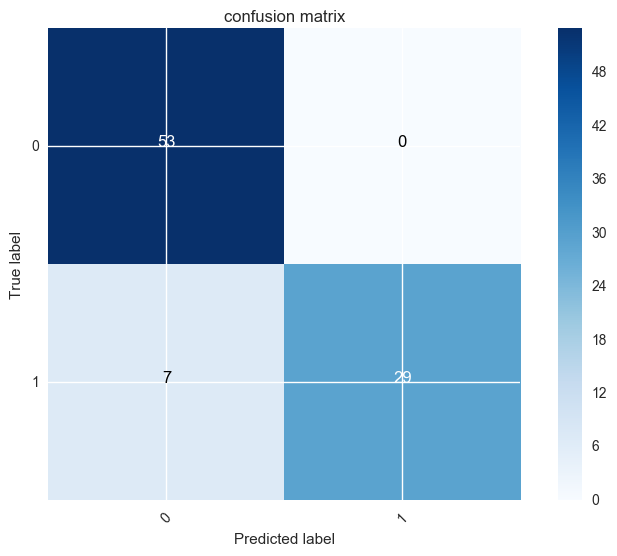

In [29]:
cnf_matrix = confusion_matrix(y_valid, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,title='confusion matrix')
plt.show()

### 可以看到DNN有效改善了模型质量，究竟改善了多少？我们随机选取10分验证集进行验证。

In [33]:
def average_results(test_model):
    accuracy_list = []
    alive_precision_list = [];alive_recall_list = [];alive_f1_list = []
    dead_precision_list = [];dead_recall_list = [];dead_f1_list = []
    for i in range(10):
        X_train,X_valid,y_train,y_valid = split_dataset(total_data)
        if test_model == 'LR':
            cnf_matrix = confusion_matrix(y_valid, clf.predict(X_valid))
        elif test_model == 'DNN':
            predict_result = model_new.predict(X_valid)
            trans_pred = []
            for i in predict_result:
                if i[0]>i[1]:
                    trans = 0.
                else:
                    trans = 1.
                trans_pred.append(trans)
            y_pred = np.array(trans_pred)
            cnf_matrix = confusion_matrix(y_valid, y_pred)
        accuracy = (cnf_matrix[1][1]+cnf_matrix[0][0])/cnf_matrix.sum()
        alive_precision = cnf_matrix[1][1]/cnf_matrix.sum(axis=0)[1]
        alive_recall = cnf_matrix[1][1]/cnf_matrix.sum(axis = 1)[1]
        alive_f1 = alive_precision * alive_recall * 2 / (alive_precision + alive_recall)
        dead_precision = cnf_matrix[0][0]/cnf_matrix.sum(axis=0)[0]
        dead_recall = cnf_matrix[0][0]/cnf_matrix.sum(axis=1)[0]
        dead_f1 = dead_precision * dead_recall * 2 / (dead_precision + dead_recall)
        #append lists
        accuracy_list.append(accuracy)
        alive_precision_list.append(alive_precision)
        alive_recall_list.append(alive_recall)
        alive_f1_list.append(alive_f1)
        dead_precision_list.append(dead_recall)
        dead_recall_list.append(dead_recall)
        dead_f1_list.append(dead_f1)
    return np.array(accuracy_list),\
             np.array(alive_precision_list),\
              np.array(alive_recall_list),\
                np.array(alive_f1_list),\
                  np.array(dead_precision_list),\
                    np.array(dead_recall_list),\
                      np.array(dead_f1_list)

accuracy_list_LR,alive_precision_list_LR,alive_recall_list_LR,\
        alive_f1_list_LR,dead_precision_list_LR,dead_recall_list_LR,dead_f1_list_LR = \
            average_results('LR')
        
accuracy_list_DNN,alive_precision_list_DNN,alive_recall_list_DNN,\
        alive_f1_list_DNN,dead_precision_list_DNN,dead_recall_list_DNN,dead_f1_list_DNN = \
            average_results('DNN')

In [34]:
# 计算各指标平均差
average_diff_accuracy = accuracy_list_DNN.mean() - accuracy_list_LR.mean()
average_diff_alive_precision = alive_precision_list_DNN.mean() - alive_precision_list_LR.mean()
average_diff_alive_recall = alive_recall_list_DNN.mean() - alive_recall_list_LR.mean()
average_diff_alive_f1 = alive_f1_list_DNN.mean() - alive_f1_list_LR.mean()
average_diff_dead_precision = dead_precision_list_DNN.mean() - dead_precision_list_LR.mean()
average_diff_dead_recall = dead_recall_list_DNN.mean() - dead_recall_list_LR.mean()
average_diff_dead_f1 = dead_f1_list_DNN.mean() - dead_f1_list_LR.mean()

In [35]:
print ('average_diff_accuracy = %.2f'%(average_diff_accuracy))
print ('average_diff_alive_precision = %.2f, average_diff_alive_recall = %.2f, average_diff_alive_f1= %.2f'%(average_diff_alive_precision,average_diff_alive_recall,average_diff_alive_f1))
print ('average_diff_dead_precision = %.2f, average_diff_dead_recall = %.2f, average_diff_dead_f1= %.2f'%(average_diff_dead_precision,average_diff_dead_recall,average_diff_dead_f1))

average_diff_accuracy = 0.11
average_diff_alive_precision = 0.18, average_diff_alive_recall = 0.13, average_diff_alive_f1= 0.15
average_diff_dead_precision = 0.10, average_diff_dead_recall = 0.10, average_diff_dead_f1= 0.09


结果显示，在验证集上，对于LogisticRegression 80%左右的准确率来说，DNN提升了模型性能约14%

### 在kaggle上测试数据

In [79]:
original_test_data = pd.read_csv("test.csv")
test_data = original_test_data.copy()

In [80]:
# Drop column 'Cabin'
test_data = test_data.drop(['Cabin'],axis = 1)
# Drop Embarked missing value
test_data = test_data[test_data['Embarked'].notnull()]
test_data['Title'] = test_data['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
# 这些称号有法语还有英语，需要依据当时的文化环境将其归类
test_data.loc[test_data[test_data.Title==' Jonkheer'].index,['Title']] = ' Master'
test_data.loc[test_data[test_data.Title.isin([' Ms',' Mlle'])].index,['Title']] = ' Miss'
test_data.loc[test_data[test_data.Title == ' Mme'].index,['Title']] = ' Mrs'
test_data.loc[test_data[test_data.Title.isin([' Capt', ' Don', ' Major', ' Col', ' Sir'])].index,['Title']] = ' Sir'
test_data.loc[test_data[test_data.Title.isin([' Dona', ' Lady', ' the Countess'])].index,['Title']] = ' Lady'
# 更新缺失值
for i in Title_list:
    test_data.loc[test_data[(test_data['Age'].isnull()) & (test_data['Title'] == i)].index,['Age']] = Title_age[i]
# 查看缺失值情况
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [81]:
test_data.loc[test_data[test_data.Fare.isnull()].index,:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [82]:
total_data[total_data.Pclass_3 == 1].Fare.mean()

13.675550101832997

In [83]:
test_data.loc[test_data[test_data.Fare.isnull()].index,['Fare']] = total_data[total_data.Pclass_3 == 1].Fare.mean()

In [84]:
dummies_Pclass_test = pd.get_dummies(test_data['Pclass'], prefix= 'Pclass')
dummies_Sex_test = pd.get_dummies(test_data['Sex'], prefix= 'Sex')
dummies_Embarked_test = pd.get_dummies(test_data['Embarked'], prefix= 'Embarked')
dummies_Title_test = pd.get_dummies(test_data['Title'], prefix= 'Title')
test_data = pd.concat([test_data, dummies_Pclass_test, dummies_Sex_test, dummies_Embarked_test, dummies_Title_test], axis=1)
#删除虚拟变量对应的原始变量
test_data.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [85]:
test_data['Age_scaled'] = scaler.transform(test_data['Age'].reshape(-1,1))
test_data['Fare_scaled'] = scaler.transform(test_data['Fare'].reshape(-1,1))

In [86]:
X_test = test_data.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*').as_matrix()[:,:]

In [87]:
LR_predict = clf.predict(X_test)
Network_test_result = model_new.predict(X_test)
trans_test_pred = []
for i in Network_test_result:
    if i[0]>i[1]:
        trans_test = 0.
    else:
        trans_test = 1.
    trans_test_pred.append(trans_test)
Network_predict = np.array(trans_test_pred)

In [88]:
LR_result = pd.DataFrame({'PassengerId':test_data['PassengerId'].as_matrix(), 'Survived':LR_predict.astype(np.int32)})
DNN_result = pd.DataFrame({'PassengerId':test_data['PassengerId'].as_matrix(), 'Survived':Network_predict.astype(np.int32)})
LR_result.to_csv("logistic_regression_predictions.csv", index=False)
DNN_result.to_csv("DNN_predictions.csv", index=False)

# kaggle测试集结果（排名前48% "Orz"）：
<img src="assets/kaggle_compare.png" width='800'>
<img src="assets/competition_result.png" width='800'>
## 大家有兴趣的话，也可以尝试去Kaggle玩玩。